In [1]:
import joblib
import os
import sys
from visualization import *

%matplotlib inline

In [2]:
# # Aggregate run results
# !{sys.executable} agg_stats_w_tabnet.py

In [3]:
nm_d = {
    
    'otto': 'Otto (9 classes)',
    'sf-crime': 'SF-Crime (39 classes)',
    
    'helena': 'Helena (100 classes)',
    'moa': 'MoA (206 labels)',
    'dionis': 'Dionis (355 classes)',
    
    'delicious': 'Delicious (983 labels)',
    'mediamill': 'Mediamill (101 labels)',
    
    'rf1': 'RF1 (8 tasks)',
    'scm20d': 'SCM20D (16 tasks)',
    
}

st_d = {
    'xgb': 'XGBoost (one-vs-all)',
    'cb': 'CatBoost (multioutput)',
    'pb': 'SketchBoost Full',
    'random': 'Random Sampling',
    'best': 'Top Outputs',
    'proj': 'Random Projection',   
    'tabnet': 'Tabnet'
}

HYPERPARAMS = 'baselines_and_params.pkl'

dataset_order = ['otto', 'dionis', 'helena', 'sf-crime', 'moa', 'scm20d', 'rf1', 'delicious', 'mediamill',]

strategy_order =  ['best', 'random', 'proj',]
baselines = ['pb', 'cb', 'xgb', 'tabnet', ]
k_limit = 20

OUTPUT_DIR = 'output/OUTPUT_MAIN'
os.makedirs(OUTPUT_DIR, exist_ok=True)

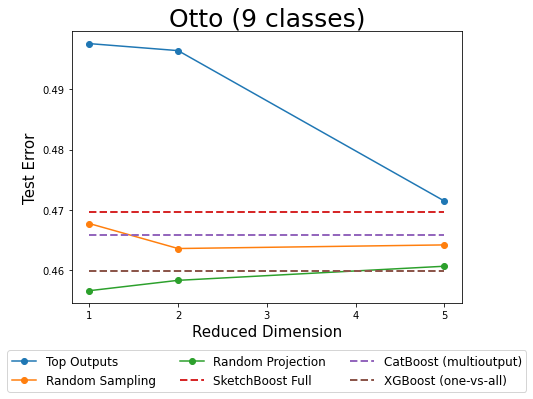

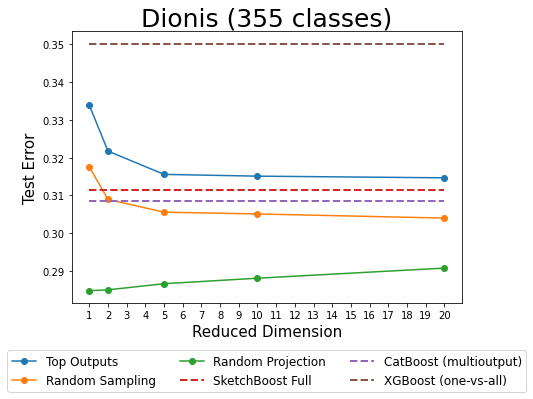

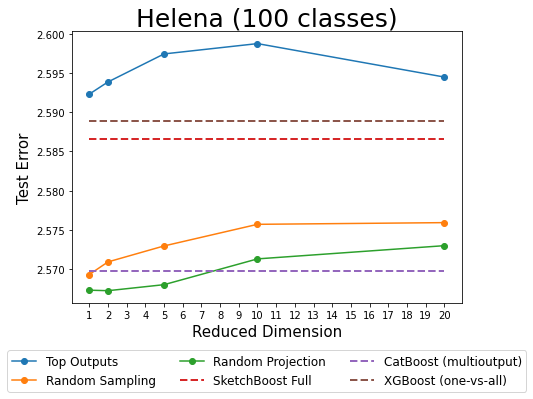

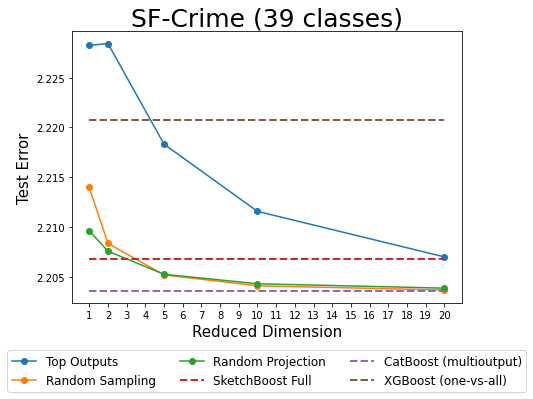

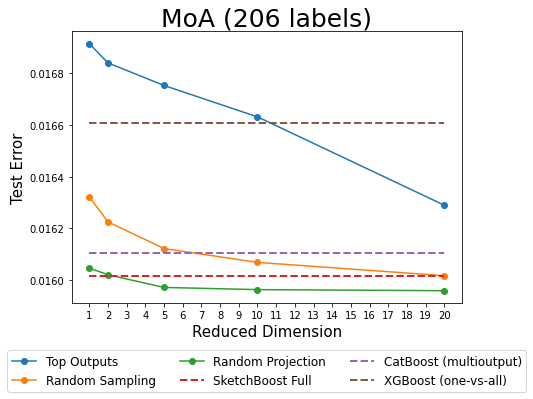

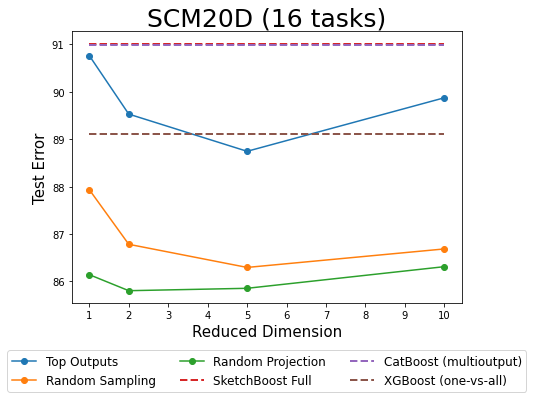

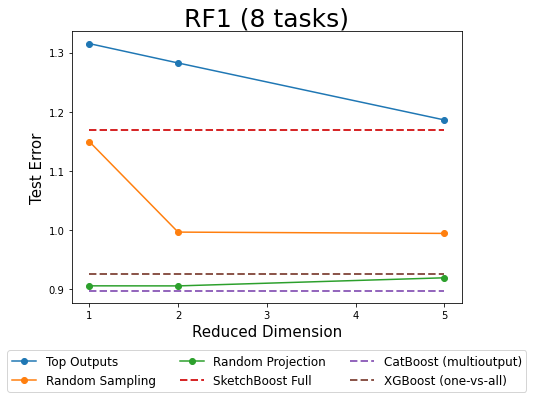

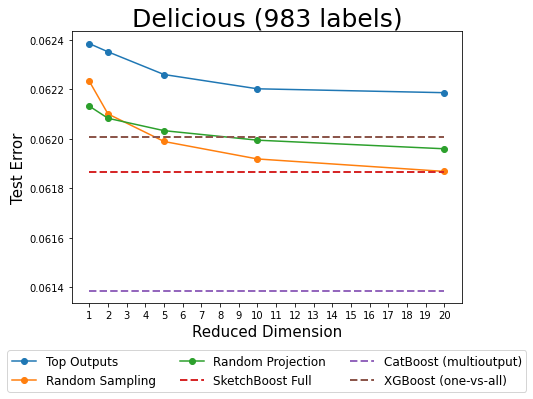

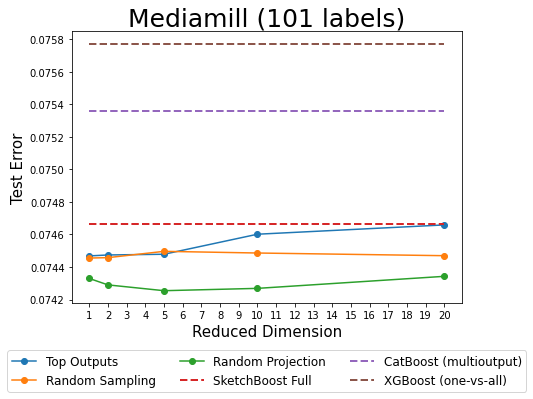

In [4]:
detailed_plot(dataset_order, 
              strategy_order, 
              'test_score', st_d, nm_d, baselines=[x for x in baselines if x != 'tabnet'], 
              alias='Test Error', output_dir=OUTPUT_DIR)

In [5]:
scores = get_summary_table(dataset_order, strategy_order, 'test_score', 
                           st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_summary_table(dataset_order, strategy_order, 'std_test_score', 
                         st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index('Dataset').astype(str)


total = (scores + '+-' + stds.set_index('Dataset').astype(str)
         ).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'summary_' + 'score_w_std' + '.csv'), index=False)

total

,Dataset,SketchBoost Full,CatBoost (multioutput),XGBoost (one-vs-all),Tabnet,Top Outputs,Random Sampling,Random Projection
0,Otto (9 classes),0.4697+-0.003,0.4658+-0.0033,0.4599+-0.0028,0.5363+-0.0064,0.4715+-0.0035,0.4636+-0.0026,0.4566+-0.0023
1,Dionis (355 classes),0.3114+-0.0009,0.3085+-0.001,0.3502+-0.002,0.4753+-0.0126,0.3146+-0.0011,0.304+-0.0014,0.2848+-0.0012
2,Helena (100 classes),2.5865+-0.0025,2.5698+-0.0025,2.5889+-0.0032,2.7197+-0.0235,2.5923+-0.0024,2.5693+-0.0022,2.5673+-0.0026
3,SF-Crime (39 classes),2.2067+-0.0003,2.2036+-0.0005,2.2208+-0.0008,2.4819+-0.02,2.207+-0.0005,2.2037+-0.0004,2.2038+-0.0004
4,MoA (206 labels),0.016+-0.0,0.0161+-0.0,0.0166+-0.0,0.0193+-0.0003,0.0163+-0.0,0.016+-0.0,0.016+-0.0
5,SCM20D (16 tasks),91.0142+-0.3397,90.9814+-0.3652,89.1045+-0.495,87.3655+-1.3316,88.7442+-0.6346,86.2964+-0.4398,85.8061+-0.5534
6,RF1 (8 tasks),1.1687+-0.0835,0.8975+-0.0384,0.925+-0.0308,3.7948+-1.5935,1.186+-0.1366,0.9944+-0.1015,0.9056+-0.0582
7,Delicious (983 labels),0.0619+-0.0001,0.0614+-0.0001,0.062+-0.0,0.0664+-0.0008,0.0622+-0.0001,0.0619+-0.0001,0.062+-0.0001
8,Mediamill (101 labels),0.0747+-0.0001,0.0754+-0.0001,0.0758+-0.0001,0.0859+-0.0033,0.0745+-0.0001,0.0745+-0.0001,0.0743+-0.0001


In [6]:
scores = get_summary_table(dataset_order, strategy_order, 'test_acc', 
                           st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_summary_table(dataset_order, strategy_order, 'std_test_acc', 
                         st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index('Dataset').astype(str)


total = (scores + '+-' + stds.set_index('Dataset').astype(str)
         ).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'summary_' + 'acc_w_std' + '.csv'), index=False)

total

,Dataset,SketchBoost Full,CatBoost (multioutput),XGBoost (one-vs-all),Tabnet,Top Outputs,Random Sampling,Random Projection
0,Otto (9 classes),0.8223+-0.0021,0.8213+-0.0012,0.8238+-0.001,0.7972+-0.0031,0.821+-0.0016,0.8236+-0.0025,0.8258+-0.001
1,Dionis (355 classes),0.9227+-0.0004,0.9234+-0.0003,0.9193+-0.0007,0.8936+-0.0032,0.9227+-0.0007,0.9251+-0.0005,0.9285+-0.0004
2,Helena (100 classes),0.3783+-0.0011,0.3808+-0.0017,0.377+-0.0012,0.3503+-0.0061,0.3773+-0.0014,0.3821+-0.0009,0.3836+-0.0019
3,SF-Crime (39 classes),0.3343+-0.0007,0.3352+-0.0008,0.3326+-0.0003,0.255+-0.0038,0.3349+-0.0006,0.3353+-0.0005,0.3357+-0.0004
4,MoA (206 labels),0.9971+-0.0,0.9971+-0.0,0.9971+-0.0,0.9967+-0.0001,0.9971+-0.0,0.9972+-0.0,0.9971+-0.0
5,SCM20D (16 tasks),0.9224+-0.0007,0.9224+-0.0006,0.9257+-0.0008,0.9281+-0.0022,0.9262+-0.001,0.9301+-0.0007,0.9309+-0.0008
6,RF1 (8 tasks),0.9995+-0.0001,0.9997+-0.0,0.9997+-0.0,0.9932+-0.0037,0.9994+-0.0001,0.9996+-0.0001,0.9997+-0.0
7,Delicious (983 labels),0.9824+-0.0,0.9825+-0.0,0.9826+-0.0,0.9816+-0.0001,0.9824+-0.0,0.9824+-0.0,0.9824+-0.0
8,Mediamill (101 labels),0.9747+-0.0001,0.9744+-0.0001,0.9746+-0.0,0.9709+-0.0011,0.9747+-0.0,0.9746+-0.0001,0.9748+-0.0


In [7]:
get_summary_table(dataset_order, strategy_order, 'best_iter', 
                           st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)

,Dataset,SketchBoost Full,CatBoost (multioutput),XGBoost (one-vs-all),Tabnet,Top Outputs,Random Sampling,Random Projection
0,Otto (9 classes),4424.8,5534.4,2142.0,27.2,4799.2,5424.4,5201.4
1,Dionis (355 classes),18519.0,19858.8,2681.0,39.4,17039.4,17990.4,11509.6
2,Helena (100 classes),13492.2,11238.2,1563.8,49.6,15042.0,16975.6,11670.2
3,SF-Crime (39 classes),3754.6,3993.6,1212.4,14.8,3790.2,3726.2,3611.4
4,MoA (206 labels),2240.6,4239.0,471.8,38.2,2606.2,5542.6,2093.0
5,SCM20D (16 tasks),19992.8,19998.0,19998.0,147.2,19992.4,19991.8,19993.6
6,RF1 (8 tasks),17001.4,19999.0,19994.6,98.4,16102.8,17076.2,16815.2
7,Delicious (983 labels),6911.2,3956.0,1611.6,143.4,7063.2,8015.0,7541.6
8,Mediamill (101 labels),17927.4,8983.2,1878.6,84.6,18623.8,19961.6,17826.6


In [8]:
time_info = get_summary_table(dataset_order, strategy_order, 'train_time', 
                           st_d, nm_d, baselines=baselines, output_dir=OUTPUT_DIR)
time_info

,Dataset,SketchBoost Full,CatBoost (multioutput),XGBoost (one-vs-all),Tabnet,Top Outputs,Random Sampling,Random Projection
0,Otto (9 classes),131.2795,73.7665,1244.9438,903.2607,113.7105,102.3624,89.6285
1,Dionis (355 classes),23919.0901,18600.3721,18635.1964,1853.4115,1889.2980,2038.0721,419.5824
2,Helena (100 classes),355.5974,436.6722,1036.0248,1195.6204,154.6307,180.6419,113.4900
3,SF-Crime (39 classes),1146.1403,659.7310,4016.9352,2682.5084,705.4014,676.2324,612.8040
4,MoA (206 labels),696.2490,9398.4015,376.3628,672.1119,103.5214,189.2574,87.0725
5,SCM20D (16 tasks),597.8406,798.6409,1432.8394,295.7300,499.3633,528.8417,479.0236
6,RF1 (8 tasks),413.7743,804.6936,315.1049,207.8435,369.8712,396.4812,340.9701
7,Delicious (983 labels),19553.5613,20120.1416,15795.5608,2902.3544,575.1124,664.0449,1259.7520
8,Mediamill (101 labels),1777.6927,10164.0577,2074.3119,1230.7093,251.4459,263.4639,294.3931


/home/jovyan/.imgenv-test-0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jovyan/.imgenv-test-0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jovyan/.imgenv-test-0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

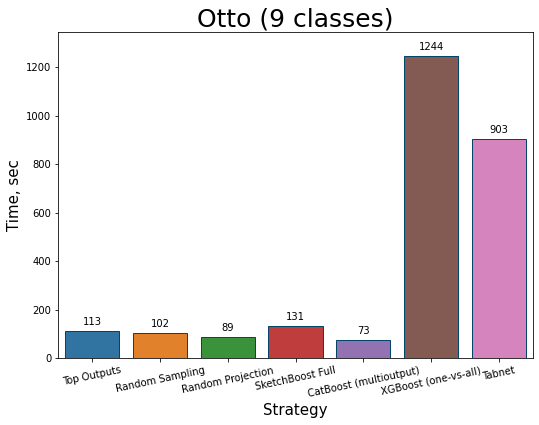

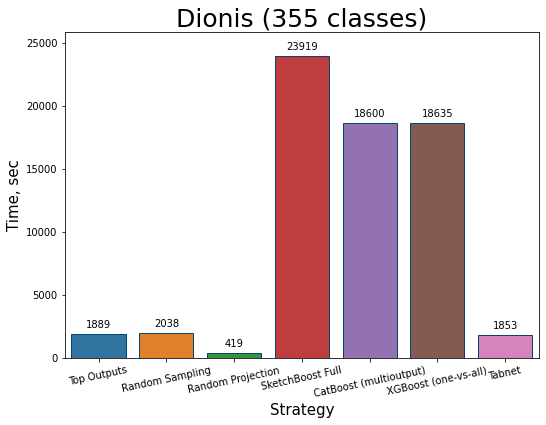

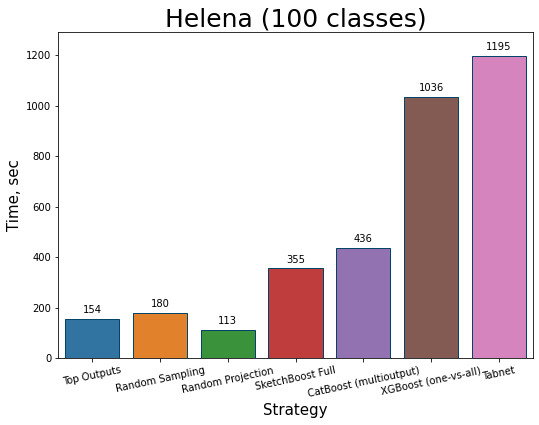

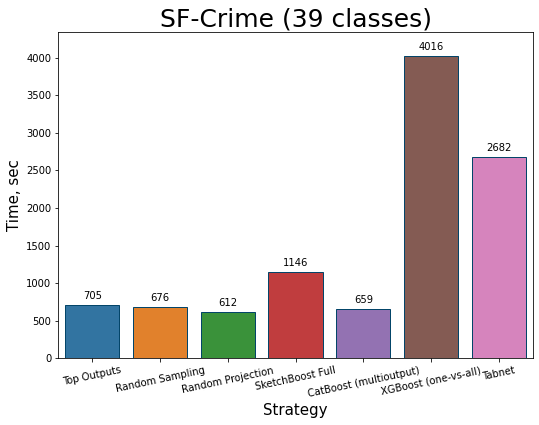

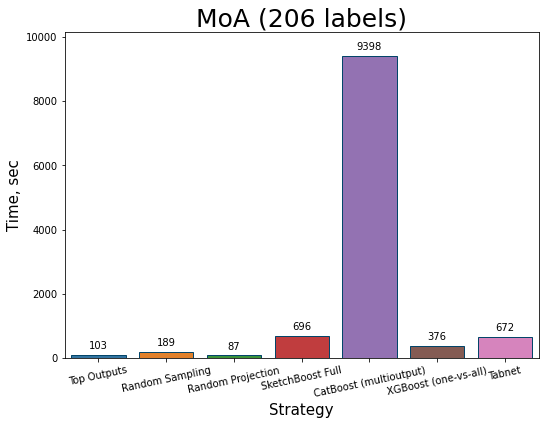

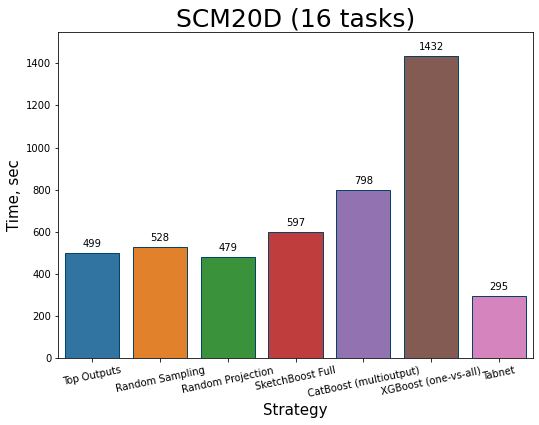

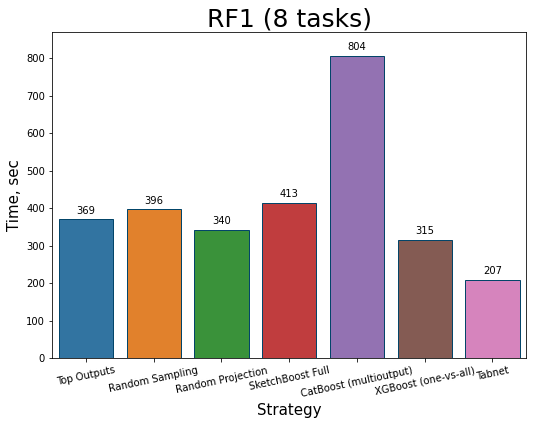

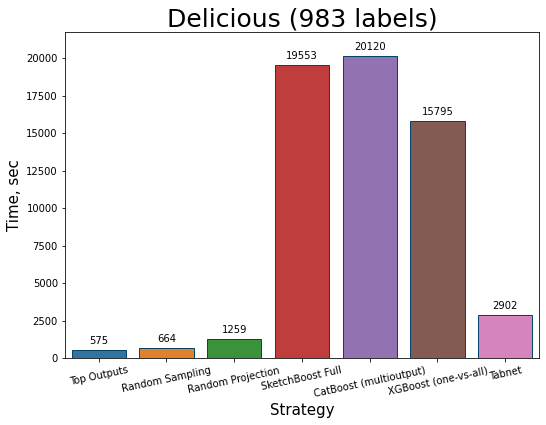

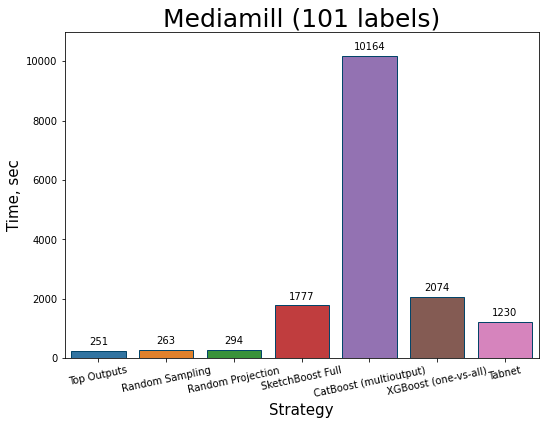

In [9]:
summary_plot(dataset_order, strategy_order, 'train_time', 'Time, sec', st_d, nm_d, r=0, baselines=baselines, 
             sorter='test_score', k_limit=20, output_dir=OUTPUT_DIR)

In [10]:
scores = get_total_table(dataset_order, strategy_order, 'test_score', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_total_table(dataset_order, strategy_order, 'std_test_score', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index(['Dataset', 'K']).astype(str)
stds = stds.set_index(['Dataset', 'K']).astype(str)

total = (scores + '+-' + stds).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'detailed_' + 'test_score_w_std' + '.csv'), index=False)
total

,Dataset,K,Otto (9 classes),Dionis (355 classes),Helena (100 classes),SF-Crime (39 classes),MoA (206 labels),SCM20D (16 tasks),RF1 (8 tasks),Delicious (983 labels),Mediamill (101 labels)
0,Tabnet,-,0.5363+-0.0064,0.4753+-0.0126,2.7197+-0.0235,2.4819+-0.02,0.0193+-0.0003,87.3655+-1.3316,3.7948+-1.5935,0.0664+-0.0008,0.0859+-0.0033
1,SketchBoost Full,-,0.4697+-0.003,0.3114+-0.0009,2.5865+-0.0025,2.2067+-0.0003,0.016+-0.0,91.0142+-0.3397,1.1687+-0.0835,0.0619+-0.0001,0.0747+-0.0001
2,XGBoost (one-vs-all),-,0.4599+-0.0028,0.3502+-0.002,2.5889+-0.0032,2.2208+-0.0008,0.0166+-0.0,89.1045+-0.495,0.925+-0.0308,0.062+-0.0,0.0758+-0.0001
3,CatBoost (multioutput),-,0.4658+-0.0033,0.3085+-0.001,2.5698+-0.0025,2.2036+-0.0005,0.0161+-0.0,90.9814+-0.3652,0.8975+-0.0384,0.0614+-0.0001,0.0754+-0.0001
4,Top Outputs,1,0.4975+-0.0031,0.3339+-0.0017,2.5923+-0.0024,2.2282+-0.0004,0.0169+-0.0,90.7613+-0.3989,1.3151+-0.0721,0.0624+-0.0001,0.0745+-0.0001
5,Top Outputs,2,0.4964+-0.0042,0.3217+-0.0019,2.5938+-0.0026,2.2284+-0.0002,0.0168+-0.0,89.5284+-0.8352,1.2823+-0.1364,0.0624+-0.0001,0.0745+-0.0001
6,Top Outputs,5,0.4715+-0.0035,0.3155+-0.0014,2.5974+-0.0019,2.2183+-0.0005,0.0168+-0.0,88.7442+-0.6346,1.186+-0.1366,0.0623+-0.0001,0.0745+-0.0001
7,Top Outputs,10,-,0.3151+-0.0014,2.5987+-0.002,2.2116+-0.0003,0.0166+-0.0,89.8727+-0.3126,-,0.0622+-0.0001,0.0746+-0.0001
8,Top Outputs,20,-,0.3146+-0.0011,2.5945+-0.002,2.207+-0.0005,0.0163+-0.0,-,-,0.0622+-0.0001,0.0747+-0.0001
9,Random Sampling,1,0.4677+-0.002,0.3175+-0.0009,2.5693+-0.0022,2.214+-0.0004,0.0163+-0.0,87.9358+-0.4112,1.1495+-0.0674,0.0622+-0.0001,0.0745+-0.0001


In [11]:
scores = get_total_table(dataset_order, strategy_order, 'test_score', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_total_table(dataset_order, strategy_order, 'std_test_score', 
                         st_d, nm_d, r=6, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index(['Dataset', 'K']).astype(str)
stds = stds.set_index(['Dataset', 'K']).astype(str)

total = (scores + '+-' + stds).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'detailed_' + 'test_score_w_std_6d' + '.csv'), index=False)


In [12]:
scores = get_total_table(dataset_order, strategy_order, 'test_acc', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_total_table(dataset_order, strategy_order, 'std_test_acc', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index(['Dataset', 'K']).astype(str)
stds = stds.set_index(['Dataset', 'K']).astype(str)

total = (scores + '+-' + stds).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'detailed_' + 'test_acc_w_std' + '.csv'), index=False)
total

,Dataset,K,Otto (9 classes),Dionis (355 classes),Helena (100 classes),SF-Crime (39 classes),MoA (206 labels),SCM20D (16 tasks),RF1 (8 tasks),Delicious (983 labels),Mediamill (101 labels)
0,Tabnet,-,0.7972+-0.0031,0.8936+-0.0032,0.3503+-0.0061,0.255+-0.0038,0.9967+-0.0001,0.9281+-0.0022,0.9932+-0.0037,0.9816+-0.0001,0.9709+-0.0011
1,SketchBoost Full,-,0.8223+-0.0021,0.9227+-0.0004,0.3783+-0.0011,0.3343+-0.0007,0.9971+-0.0,0.9224+-0.0007,0.9995+-0.0001,0.9824+-0.0,0.9747+-0.0001
2,XGBoost (one-vs-all),-,0.8238+-0.001,0.9193+-0.0007,0.377+-0.0012,0.3326+-0.0003,0.9971+-0.0,0.9257+-0.0008,0.9997+-0.0,0.9826+-0.0,0.9746+-0.0
3,CatBoost (multioutput),-,0.8213+-0.0012,0.9234+-0.0003,0.3808+-0.0017,0.3352+-0.0008,0.9971+-0.0,0.9224+-0.0006,0.9997+-0.0,0.9825+-0.0,0.9744+-0.0001
4,Top Outputs,1,0.8172+-0.0022,0.9192+-0.0006,0.3773+-0.0014,0.3275+-0.0006,0.997+-0.0,0.9228+-0.0006,0.9992+-0.0001,0.9823+-0.0,0.9747+-0.0
5,Top Outputs,2,0.8171+-0.0016,0.9214+-0.0004,0.3772+-0.0021,0.3275+-0.0008,0.997+-0.0,0.9249+-0.0013,0.9993+-0.0001,0.9823+-0.0,0.9747+-0.0
6,Top Outputs,5,0.821+-0.0016,0.9229+-0.0004,0.376+-0.0019,0.3315+-0.0003,0.997+-0.0,0.9262+-0.001,0.9994+-0.0001,0.9823+-0.0,0.9747+-0.0001
7,Top Outputs,10,-,0.9229+-0.0003,0.3757+-0.0013,0.3333+-0.0003,0.997+-0.0,0.9243+-0.0005,-,0.9824+-0.0,0.9747+-0.0
8,Top Outputs,20,-,0.9227+-0.0007,0.3766+-0.0008,0.3349+-0.0006,0.9971+-0.0,-,-,0.9824+-0.0,0.9747+-0.0001
9,Random Sampling,1,0.8228+-0.0011,0.9224+-0.0005,0.3821+-0.0009,0.332+-0.0002,0.9971+-0.0,0.9276+-0.0007,0.9995+-0.0001,0.9824+-0.0,0.9746+-0.0001


In [13]:
scores = get_total_table(dataset_order, strategy_order, 'test_acc', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)
stds = get_total_table(dataset_order, strategy_order, 'std_test_acc', 
                         st_d, nm_d, r=6, baselines=baselines, output_dir=OUTPUT_DIR)


scores = scores.set_index(['Dataset', 'K']).astype(str)
stds = stds.set_index(['Dataset', 'K']).astype(str)

total = (scores + '+-' + stds).replace('-+--', '-').reset_index()
total.to_csv(os.path.join(OUTPUT_DIR, 'detailed_' + 'test_acc_w_std_6d' + '.csv'), index=False)

In [14]:
get_total_table(dataset_order, strategy_order, 'train_time', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)

,Dataset,K,Otto (9 classes),Dionis (355 classes),Helena (100 classes),SF-Crime (39 classes),MoA (206 labels),SCM20D (16 tasks),RF1 (8 tasks),Delicious (983 labels),Mediamill (101 labels)
0,Tabnet,-,903.2607,1853.4115,1195.6204,2682.5084,672.1119,295.73,207.8435,2902.3544,1230.7093
1,SketchBoost Full,-,131.2795,23919.0901,355.5974,1146.1403,696.2490,597.8406,413.7743,19553.5613,1777.6927
2,XGBoost (one-vs-all),-,1244.9438,18635.1964,1036.0248,4016.9352,376.3628,1432.8394,315.1049,15795.5608,2074.3119
3,CatBoost (multioutput),-,73.7665,18600.3721,436.6722,659.7310,9398.4015,798.6409,804.6936,20120.1416,10164.0577
4,Top Outputs,1,129.5913,783.7018,154.6307,174.2330,40.0038,458.9562,351.1528,213.8397,251.4459
5,Top Outputs,2,126.5449,810.4931,151.6850,207.5298,45.1278,476.2507,364.9863,229.3393,276.4852
6,Top Outputs,5,113.7105,1003.3881,146.3063,270.8648,59.4057,499.3633,369.8712,274.7669,313.6988
7,Top Outputs,10,-,1293.5372,138.1224,425.9713,69.9126,551.4483,-,375.7564,386.5528
8,Top Outputs,20,-,1889.2980,156.4791,705.4014,103.5214,-,-,575.1124,529.5114
9,Random Sampling,1,104.4247,835.5595,180.6419,198.0625,61.5073,485.6434,347.9057,230.6440,263.4639


In [15]:
get_total_table(dataset_order, strategy_order, 'best_iter', 
                         st_d, nm_d, r=4, baselines=baselines, output_dir=OUTPUT_DIR)

,Dataset,K,Otto (9 classes),Dionis (355 classes),Helena (100 classes),SF-Crime (39 classes),MoA (206 labels),SCM20D (16 tasks),RF1 (8 tasks),Delicious (983 labels),Mediamill (101 labels)
0,Tabnet,-,27.2,39.4,49.6,14.8,38.2,147.2,98.4,143.4,84.6
1,SketchBoost Full,-,4424.8,18519.0,13492.2,3754.6,2240.6,19992.8,17001.4,6911.2,17927.4
2,XGBoost (one-vs-all),-,2142.0,2681.0,1563.8,1212.4,471.8,19998.0,19994.6,1611.6,1878.6
3,CatBoost (multioutput),-,5534.4,19858.8,11238.2,3993.6,4239.0,19998.0,19999.0,3956.0,8983.2
4,Top Outputs,1,7654.8,17338.8,15042.0,3467.6,3813.6,19998.2,17787.6,7693.6,18623.8
5,Top Outputs,2,7022.8,16747.4,14344.4,3660.0,3743.6,19983.6,17431.2,7439.0,19113.0
6,Top Outputs,5,4799.2,16847.0,13611.8,3457.6,3613.2,19992.4,16102.8,7068.4,18447.0
7,Top Outputs,10,-,16779.4,11975.2,3699.6,2831.6,19996.6,-,7085.6,17845.4
8,Top Outputs,20,-,17039.4,11985.6,3790.2,2606.2,-,-,7063.2,17288.2
9,Random Sampling,1,5937.2,17983.8,16975.6,3915.8,6161.8,19994.6,17230.8,8134.2,19961.6


In [16]:
hyperparams = joblib.load(os.path.join('runs', HYPERPARAMS))
hyperparams = {x: hyperparams[x] for x in hyperparams if x[0] in dataset_order and x[1] != 'tabnet'}

hp = DataFrame({x: hyperparams[x]['params'] for x in hyperparams}).T
hp['Completed Trials'] = Series({x: hyperparams[x]['num_trials'] for x in hyperparams})
hp.index.names = ('Dataset', 'Framework')
hp = hp.reset_index()
hp['Dataset'] = hp['Dataset'].map(nm_d).map(lambda x: x.split(' ')[0])
hp['Framework'] = hp['Framework'].map(st_d).map(lambda x: x.split(' ')[0])
hp.to_csv(os.path.join(OUTPUT_DIR, 'hyper.csv'), index=False)
hp

,Dataset,Framework,min_data_in_leaf,subsample,max_depth,lambda_l2,Completed Trials
0,Otto,CatBoost,47.000000,0.889871,10.0,3.830034,31
1,Otto,XGBoost,0.000010,0.580116,12.0,23.569951,31
2,Dionis,CatBoost,1.000000,1.000000,6.0,1.000000,6
3,Dionis,XGBoost,0.000010,1.000000,6.0,1.000000,3
4,Helena,CatBoost,2.000000,0.546926,6.0,12.773937,31
5,Helena,XGBoost,0.337340,0.504766,6.0,23.325277,31
6,SF-Crime,CatBoost,2.000000,0.941623,11.0,2.646515,31
7,SF-Crime,XGBoost,1.256824,0.918289,12.0,8.374243,24
8,MoA,CatBoost,30.000000,0.880233,4.0,1.031856,10
9,MoA,XGBoost,0.003430,0.935334,3.0,0.370817,31


In [17]:
hyperparams = joblib.load(os.path.join('runs', HYPERPARAMS))
hyperparams = {x: hyperparams[x] for x in hyperparams if x[0] in dataset_order and x[1] == 'tabnet'}

hp = DataFrame({x: hyperparams[x]['params'] for x in hyperparams}).T
hp['Completed Trials'] = Series({x: hyperparams[x]['num_trials'] for x in hyperparams})
hp.index.names = ('Dataset', 'Framework')
hp = hp.reset_index()
hp['Dataset'] = hp['Dataset'].map(nm_d).map(lambda x: x.split(' ')[0])
hp['Framework'] = hp['Framework'].map(st_d).map(lambda x: x.split(' ')[0])
hp = hp.drop('Framework', axis=1)
hp.to_csv(os.path.join(OUTPUT_DIR, 'hyper_tab.csv'), index=False)
hp

,Dataset,lr,Completed Trials
0,Otto,0.039473,11
1,Dionis,0.010951,7
2,Helena,0.008036,11
3,SF-Crime,0.020000,3
4,MoA,0.020000,10
5,SCM20D,0.020000,11
6,RF1,0.020000,11
7,Delicious,0.023071,11
8,Mediamill,0.031523,11


In [18]:
!rm {os.path.join(OUTPUT_DIR, 'experiments_main.tar')}
!tar --totals -cvf {os.path.join(OUTPUT_DIR, 'experiments_main.tar')} {OUTPUT_DIR}

output/OUTPUT_MAIN/
output/OUTPUT_MAIN/detailed_test_score_w_std_6d.csv
output/OUTPUT_MAIN/summary_train_time/
output/OUTPUT_MAIN/summary_train_time/sf-crime.png
output/OUTPUT_MAIN/summary_train_time/moa.png
output/OUTPUT_MAIN/summary_train_time/mediamill.png
output/OUTPUT_MAIN/summary_train_time/helena.png
output/OUTPUT_MAIN/summary_train_time/otto.png
output/OUTPUT_MAIN/summary_train_time/rf1.png
output/OUTPUT_MAIN/summary_train_time/dionis.png
output/OUTPUT_MAIN/summary_train_time/scm20d.png
output/OUTPUT_MAIN/summary_train_time/delicious.png
output/OUTPUT_MAIN/summary_std_test_score.csv
output/OUTPUT_MAIN/detailed_std_test_score.csv
output/OUTPUT_MAIN/detailed_test_score_w_std.csv
output/OUTPUT_MAIN/summary_train_time.csv
output/OUTPUT_MAIN/summary_test_score.csv
output/OUTPUT_MAIN/detailed_train_time.csv
output/OUTPUT_MAIN/detailed_std_test_acc.csv
output/OUTPUT_MAIN/detailed_test_acc_w_std.csv
output/OUTPUT_MAIN/summary_score_w_std.csv
output/OUTPUT_MAIN/summary_best_iter.csv
out